In [14]:
from brian2 import *
%matplotlib inline
import numpy as np
import pytime
    
n = 28
nL1 = nL2 = n**2

[X,Y] = np.meshgrid(range(n), range(n))

taum = 10*ms
taue = 100*ms
taui = 100*ms
duration = 1000*ms

eqsPOISSON ='''
rates : Hz
x : 1 (constant)
y : 1 (constant)
'''

eqsLGN ='''
dv/dt  = (ge-gi-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
x : 1 (constant)
y : 1 (constant)
'''

L1 = NeuronGroup(nL1,
                 eqsPOISSON,
                 threshold='rand()<rates*dt')

L1.x = X.flatten()
L1.y = Y.flatten()
FR = 200*Hz
pat = range(nL1)
L1.rates = pat*FR/nL1

L2 = NeuronGroup(nL2,
                 eqsLGN,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L2.x = X.flatten()
L2.y = Y.flatten()

dge = 200*mV

e1 = Synapses(L1, L2, on_pre='ge += dge')
e1.connect(condition = 'i==j')

i1 = Synapses(L1, L2, on_pre='gi += 1/8*dge')
i1.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2 and i!=j')

sp1 = SpikeMonitor(L1)
sp2 = SpikeMonitor(L2)

run(duration)
MFR1c = asarray(sp1.count/duration)
MFR2c = asarray(sp2.count/duration)

## I/O firing rate (as the increase in synaptic current changes dge)

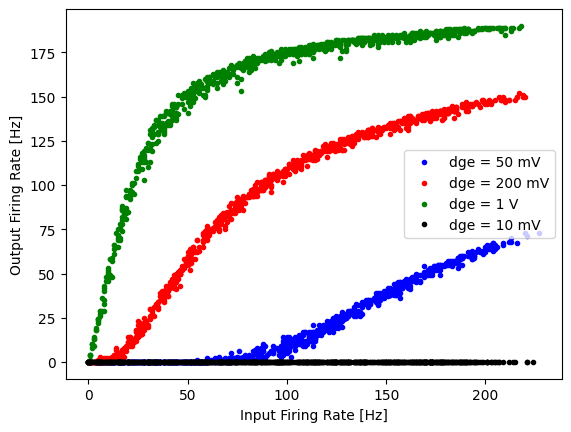

In [34]:
plot(MFR1,MFR2,'.b',label='dge = 50 mV')
plot(MFR1a,MFR2a,'.r',label='dge = 200 mV')
plot(MFR1b,MFR2b,'.g',label='dge = 1 V')
plot(MFR1c,MFR2c,'.k',label='dge = 10 mV')
xlabel('Input Firing Rate [Hz]')
ylabel('Output Firing Rate [Hz]')
legend()

## I/O firing rate (varying dge) with lateral inhibition

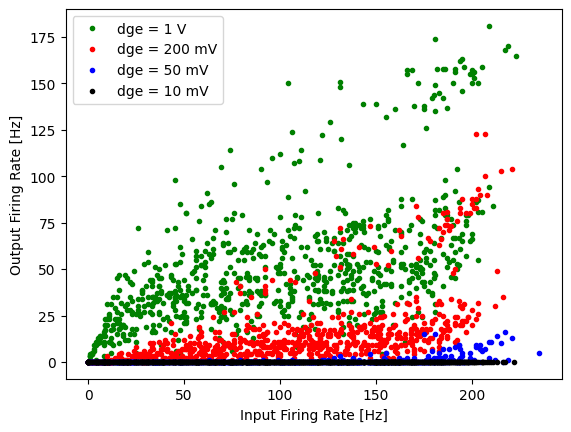

In [9]:
plot(MFR1b,MFR2b,'.g',label='dge = 1 V')
plot(MFR1a,MFR2a,'.r',label='dge = 200 mV')
plot(MFR1,MFR2,'.b',label='dge = 50 mV')
plot(MFR1c,MFR2c,'.k',label='dge = 10 mV')
xlabel('Input Firing Rate [Hz]')
ylabel('Output Firing Rate [Hz]')
legend()

## I/O firing rate (varying excitatory synaptic time constant, $\tau_e$)

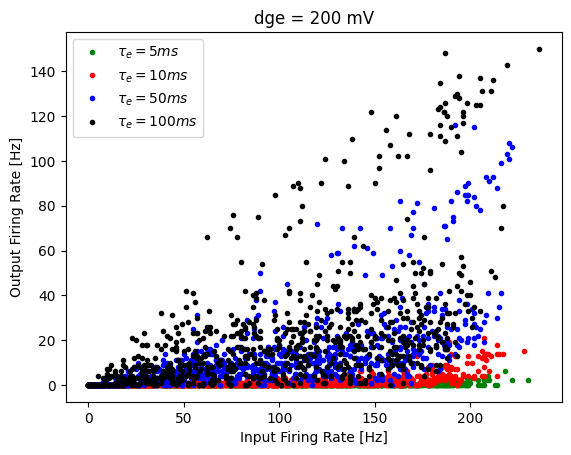

In [21]:
plot(MFR1,MFR2,'.g',label=r'$\tau_e = 5 ms$')
plot(MFR1a,MFR2a,'.r',label=r'$\tau_e = 10 ms$')
plot(MFR1b,MFR2b,'.b',label=r'$\tau_e = 50 ms$')
plot(MFR1c,MFR2c,'.k',label=r'$\tau_e = 100 ms$')
title('dge = 200 mV')
xlabel('Input Firing Rate [Hz]')
ylabel('Output Firing Rate [Hz]')
legend()

## I/O firing rate (varying inhibitory synaptic time constant, $\tau_i$)

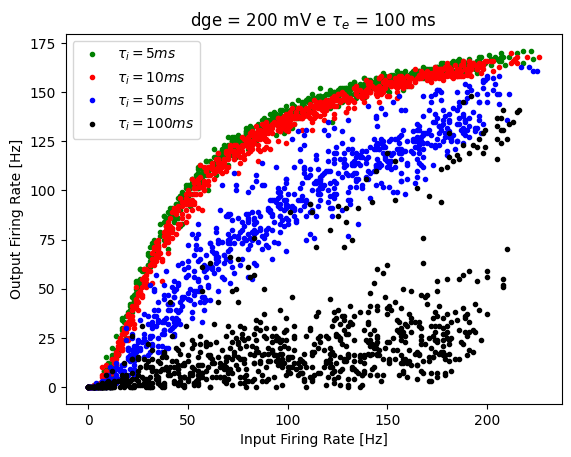

In [15]:
plot(MFR1,MFR2,'.g',label=r'$\tau_i = 5 ms$')
plot(MFR1a,MFR2a,'.r',label=r'$\tau_i = 10 ms$')
plot(MFR1b,MFR2b,'.b',label=r'$\tau_i = 50 ms$')
plot(MFR1c,MFR2c,'.k',label=r'$\tau_i = 100 ms$')
title(r'dge = 200 mV e $\tau_e$ = 100 ms')
xlabel('Input Firing Rate [Hz]')
ylabel('Output Firing Rate [Hz]')
legend()